## Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy

import scipy.io

import sys
import os

import json

from matplotlib import pyplot as plt
from pylab import hist, show, xticks, yticks
import seaborn as sns

import networkx as nx

### Load Files

### Read json files and convert to dataframe

In [ ]:
def get_all_file_from_dir(_dir):
    all_files = []
    for dirname, _, filenames, in os.walk(_dir):
        for filename in filenames:
            all_files.append(os.path.join(dirname, filename))
        return all_files

In [ ]:
#dir_buzz_par = "https://github.com/KaiDMML/FakeNewsNet/blob/old-version/Data/BuzzFeed/"
dir_buzz_par = "/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/FakeNewsNet-old-version/Data/BuzzFeed/"
dir_buzz_fake = dir_buzz_par+"FakeNewsContent/"
dir_buzz_real = dir_buzz_par+"RealNewsContent/"


#dir_politi_par = "https://github.com/KaiDMML/FakeNewsNet/blob/old-version/Data/PolitiFact/"
dir_politi_par = "/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/FakeNewsNet-old-version/Data/PolitiFact/"
dir_politi_fake = dir_politi_par +"FakeNewsContent/"
dir_politi_real = dir_politi_par+"RealNewsContent/"

In [ ]:
files_buzz_fake = get_all_file_from_dir(dir_buzz_fake)
files_buzz_real = get_all_file_from_dir(dir_buzz_real)
files_politi_fake = get_all_file_from_dir(dir_politi_fake)
files_politi_real = get_all_file_from_dir(dir_politi_real)

In [ ]:
df_buzz_fake = pd.concat(pd.read_json(f, orient='index').T for f in files_buzz_fake)
df_buzz_fake["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_buzz_fake]
df_buzz_fake.set_index("news_alph_id", inplace = True)
df_buzz_fake["plt"] = "bf"
df_buzz_fake["news_type"] = "fake"



df_buzz_real = pd.concat(pd.read_json(f, orient='index').T for f in files_buzz_real)
df_buzz_real["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_buzz_real]
df_buzz_real.set_index("news_alph_id", inplace = True)
df_buzz_real["plt"] = "bf"
df_buzz_real["news_type"] = "real"


df_politi_fake = pd.concat(pd.read_json(f, orient='index').T for f in files_politi_fake)
df_politi_fake["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_politi_fake]
df_politi_fake.set_index("news_alph_id", inplace = True)
df_politi_fake["plt"] = "pf"
df_politi_fake["news_type"] = "fake"




df_politi_real = pd.concat(pd.read_json(f, orient='index').T for f in files_politi_real)
df_politi_real["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_politi_real]
df_politi_real.set_index("news_alph_id", inplace = True)
df_politi_real["plt"] = "pf"
df_politi_real["news_type"] = "real"

TypeError: ignored

In [ ]:
df_bf_news = pd.concat([df_buzz_fake, df_buzz_real])

In [ ]:
df_poli_news = pd.concat([df_politi_fake, df_politi_real])

In [ ]:
df_bf_news.head()

,top_img,text,authors,keywords,meta_data,canonical_link,images,title,url,summary,movies,publish_date,source,plt,news_type
news_alph_id,,,,,,,,,,,,,,,
BuzzFeed_Fake_28,http://eaglerising.com/wp-content/uploads/2016...,A Daisy of a Rerun\n\nI am of an age which inc...,"[View All Posts, Jim Bowman]",[],"{'description': 'Obama stated of Hillary, “She...",http://eaglerising.com/37040/michelle-obama-at...,[http://constitution.com/wp-content/uploads/20...,"“If You Can’t Run Your Own House, You Certainl...",http://eaglerising.com/37040/michelle-obama-at...,,[https://www.youtube.com/embed/uO0R4k1tVMs?fea...,{'$date': 1474874411000},http://eaglerising.com,bf,fake
BuzzFeed_Fake_17,http://eaglerising.com/wp-content/uploads/2016...,I can’t wait for “Weekend at Chelsea’s” to hit...,"[View All Posts, Matt Barber]",[],{'description': 'Am I saying there’s no chance...,http://eaglerising.com/36912/is-it-the-beginni...,[http://constitution.com/wp-content/uploads/20...,Is it the Beginning of the End for Hillary Cli...,http://eaglerising.com/36912/is-it-the-beginni...,,[],{'$date': 1474444240000},http://eaglerising.com,bf,fake
BuzzFeed_Fake_45,http://freedomdaily.com/wp-content/uploads/201...,131.1k SHARES Facebook Twitter\n\nWell tell us...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/female-muslim-american...,[https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...,Female Muslim-American Olympian Bashes U.S.A. ...,http://freedomdaily.com/female-muslim-american...,,[],{'$date': 1470794442000},http://freedomdaily.com,bf,fake
BuzzFeed_Fake_41,http://freedomdaily.com/wp-content/uploads/201...,0 SHARES Facebook Twitter\n\nBernard Sansaricq...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/former-haitian-senate-...,[http://constitution.com/wp-content/uploads/20...,Clinton's Exploited Haiti Earthquake ‘to Steal...,http://freedomdaily.com/former-haitian-senate-...,,[],{'$date': 1474503317000},http://freedomdaily.com,bf,fake
BuzzFeed_Fake_46,http://freedomdaily.com/wp-content/uploads/201...,4.3k SHARES Facebook Twitter\n\nCharlotte riot...,[],[],"{'googlebot': 'noimageindex', 'generator': 'Po...",http://freedomdaily.com/charlotte-thugs-leaves...,[http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...,Charlotte Thugs Leaves Cop’s Body With Disgust...,http://freedomdaily.com/charlotte-thugs-leaves...,,[],{'$date': 1474566193000},http://freedomdaily.com,bf,fake


In [ ]:
df_all_news = pd.concat([df_bf_news, df_poli_news])

In [ ]:
df_all_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, BuzzFeed_Fake_28 to PolitiFact_Real_57
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   top_img         383 non-null    object
 1   text            422 non-null    object
 2   authors         383 non-null    object
 3   keywords        383 non-null    object
 4   meta_data       383 non-null    object
 5   canonical_link  383 non-null    object
 6   images          383 non-null    object
 7   title           422 non-null    object
 8   url             383 non-null    object
 9   summary         383 non-null    object
 10  movies          383 non-null    object
 11  publish_date    297 non-null    object
 12  source          383 non-null    object
 13  plt             422 non-null    object
 14  news_type       422 non-null    object
dtypes: object(15)
memory usage: 52.8+ KB


Missing Value comparison

In [ ]:
df_nan_count_fake = pd.DataFrame((df_all_news[df_all_news["news_type"] == "fake"].isnull().sum() / df_all_news.shape[0])*100, columns=["nan_count"])
df_nan_count_fake["nwes_type"] = "fake"

df_nan_count_real = pd.DataFrame((df_all_news[df_all_news["news_type"] == "real"].isnull().sum() / df_all_news.shape[0])*100, columns=["nan_count"])
df_nan_count_real["nwes_type"] = "real"

In [ ]:
df_nan_count = pd.concat([df_nan_count_fake, df_nan_count_real])

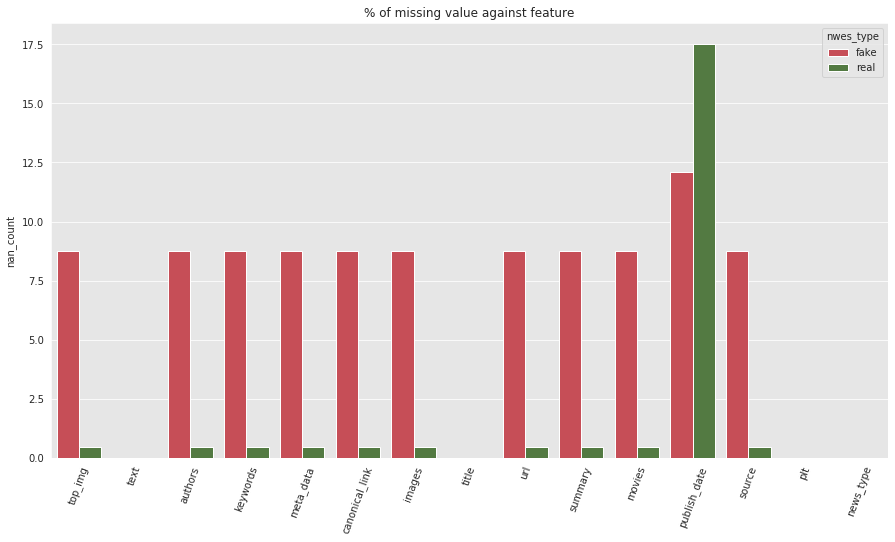

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15,8))
    plt.xticks(rotation = 70)
    plt.title("% of missing value against feature")
    ax = sns.barplot(x=df_nan_count.index.tolist(), y="nan_count", hue="nwes_type", data=df_nan_count, palette=sns.diverging_palette(10, 120, sep=1, n=2))


Fake news have more missing information of [ top image, authors, keywords, meta_data, cannonical link, images, url, summary, published date and summary]

## Load text meta data

### BuzzFeed

In [ ]:
dir_bf_news = dir_buzz_par + "News.txt"
dir_bf_user = dir_buzz_par + "User.txt"
dir_bf_news_user = dir_buzz_par + "BuzzFeedNewsUser.txt"
dir_bf_user_user = dir_buzz_par + "BuzzFeedUserUser.txt"

In [ ]:
bf_news = open(dir_bf_news).readlines()
with open(dir_bf_news, encoding="utf-8") as file:
    bf_news = [l.rstrip("\n") for l in file]
#Convert to DataFrame
df_bf_news = pd.DataFrame(bf_news, columns=["news_alph_id"])

In [ ]:
bf_user = open(dir_bf_user).readlines()
with open(dir_bf_user, encoding="utf-8") as file:
    bf_user = [l.rstrip("\n") for l in file]
#Convert to DataFrame
df_bf_user = pd.DataFrame(bf_user, columns=["user_alph_id"])

In [ ]:
df_bf_news_user = pd.read_csv(dir_bf_news_user, header = None, sep="\t", names = ["news_num_id", "user_num_id", "times"])

In [ ]:
df_bf_user_user = pd.read_csv(dir_bf_user_user, header = None, sep="\t", names = ["follower_num_id", "user_num_id"])

In [ ]:
df_bf_user_user

,follower_num_id,user_num_id
0,48,1
1,899,1
2,6781,1
3,10097,1
4,100,2
...,...,...
634745,6636,15257
634746,8135,15257
634747,9125,15257
634748,10714,15257


#### Counting number of followers

In [ ]:
df_bf_user_user["user_num_id"].value_counts().values

array([2004, 1653, 1269, ...,    1,    1,    1])

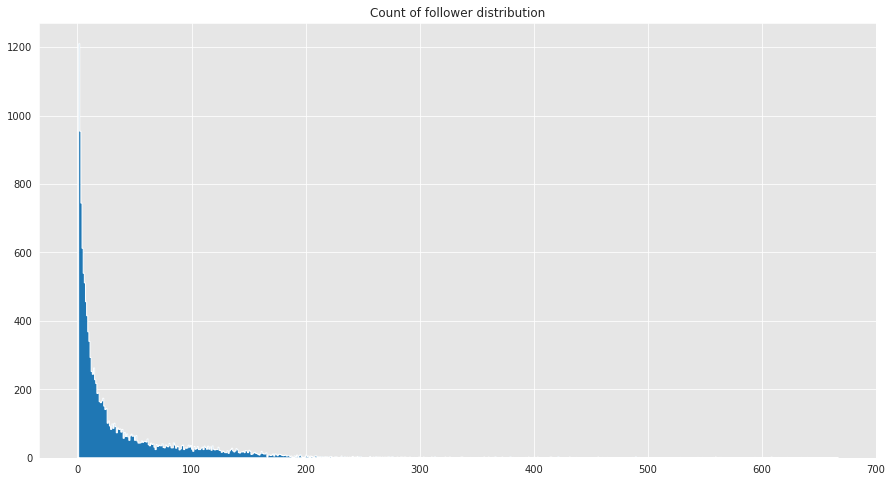

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15,8))
    plt.title("Count of follower distribution")
    plt.hist(df_bf_user_user["user_num_id"].value_counts(), bins=np.arange(max(df_bf_user_user["user_num_id"].value_counts())/3), histtype='stepfilled')

So some people has really large number of followers (Max 2004, but rest of them don't)

In [ ]:
max(df_bf_user_user["user_num_id"].value_counts())

2004

#### Count number of followee [Who is following how many people]

In [ ]:
df_bf_user_user["follower_num_id"].value_counts().values

array([4021, 3898, 3814, ...,    1,    1,    1])

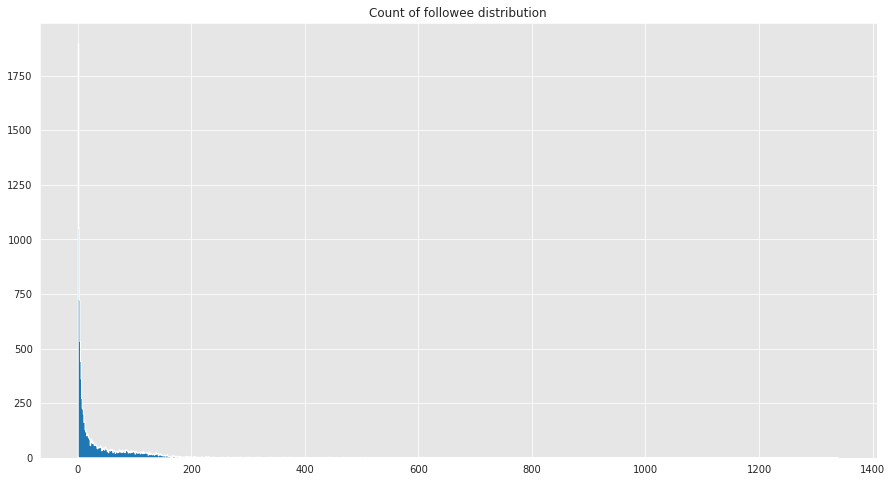

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15,8))
    plt.title("Count of followee distribution")
    plt.hist(df_bf_user_user["follower_num_id"].value_counts(), bins=np.arange(max(df_bf_user_user["follower_num_id"].value_counts())/3), histtype='stepfilled')

Some user are following other 4021 user!

#### Counting number news-user

In [ ]:
df_bf_news_user.head()

,news_num_id,user_num_id,times
0,45,1,1
1,127,2,1
2,115,3,1
3,180,3,1
4,140,4,1


In [ ]:
df_bf_news_user.describe()

,news_num_id,user_num_id,times
count,22779.000000,22779.000000,22779.000000
mean,95.962465,7570.730849,1.108038
std,52.974262,4394.913591,0.546427
min,1.000000,1.000000,1.000000
25%,45.000000,3768.500000,1.000000
50%,93.000000,7499.000000,1.000000
75%,141.000000,11351.500000,1.000000
max,182.000000,15257.000000,43.000000


#### Count news

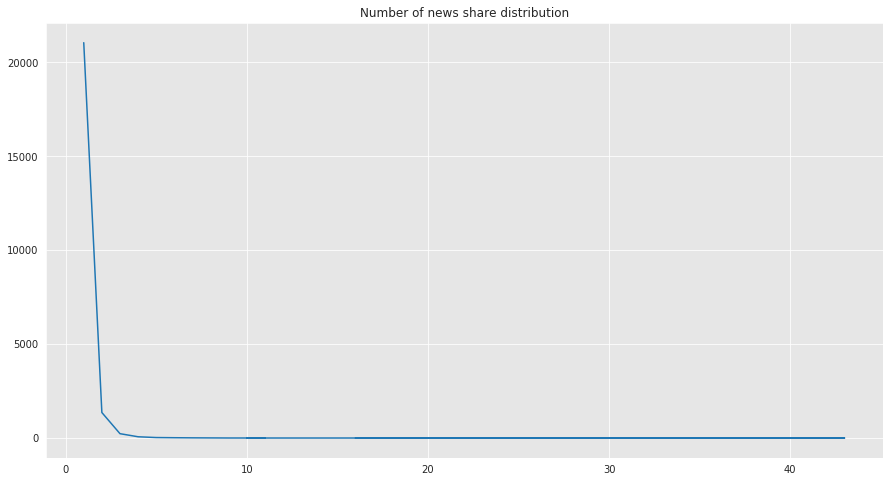

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    #xticks(range(1, 50, 1))
    plt.figure(figsize=(15,8))
    plt.title("Number of news share distribution")
    df_bf_news_user["times"].value_counts().plot()

In [ ]:
df_bf_news_user["times"].value_counts()

1     21047
2      1359
3       233
4        68
5        27
6        18
7        11
8         7
9         3
11        2
10        2
43        1
16        1
Name: times, dtype: int64

#### How many times any specific user has shared

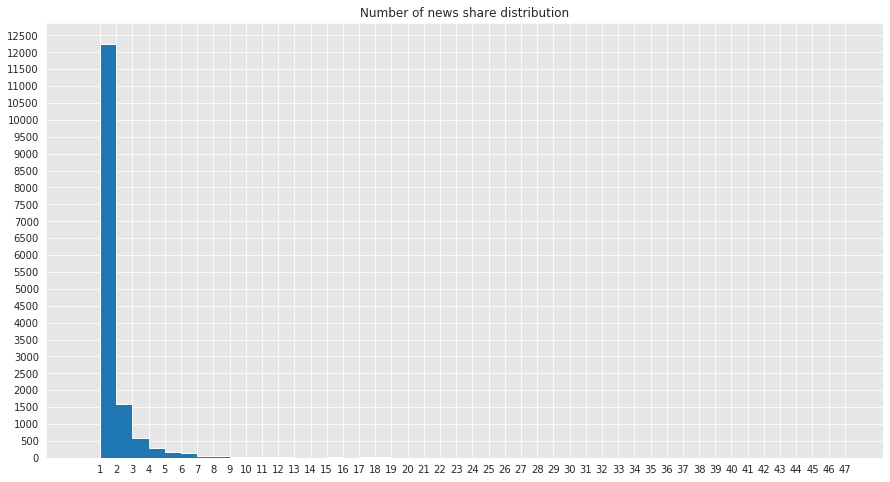

In [ ]:

with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15,8))
    plt.title("Number of news share distribution")
    yticks(range(0, 13000, 500))
    xticks(range(1, max(df_bf_news_user["user_num_id"].value_counts()), 1))
    plt.hist(df_bf_news_user["user_num_id"].value_counts(), bins=np.arange(max(df_bf_news_user["user_num_id"].value_counts())), histtype='stepfilled')

So some people has really large number of followers (Max 2004, but rest of them don't)

In [ ]:
max(df_bf_user_user["user_num_id"].value_counts())

2004

#### Count number of followee [Who is following how many people]

In [ ]:
df_bf_user_user["follower_num_id"].value_counts().values

array([4021, 3898, 3814, ...,    1,    1,    1])

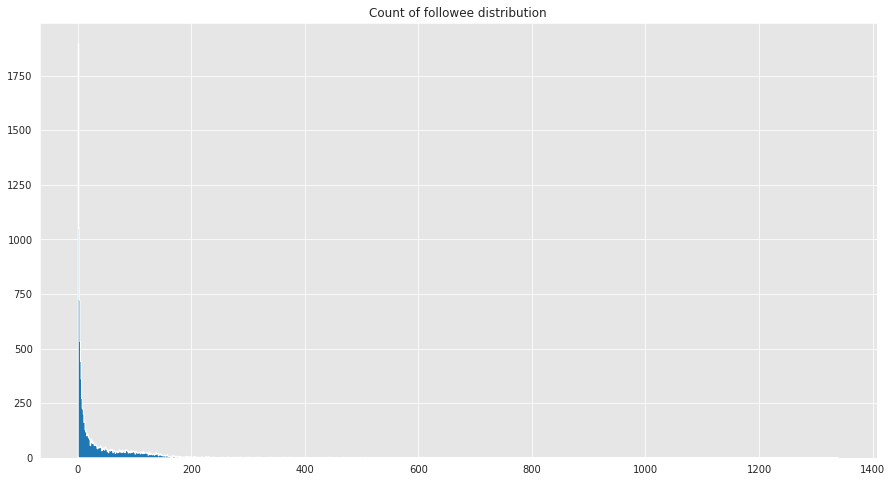

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
        plt.figure(figsize=(15,8))
        plt.title("Count of followee distribution")
        plt.hist(df_bf_user_user["follower_num_id"].value_counts(), bins=np.arange(max(df_bf_user_user["follower_num_id"].value_counts())/3), histtype='stepfilled')

Some user are following other 4021 user!

### Politifact

In [ ]:
dir_poli_news = dir_politi_par + "News.txt"
dir_poli_user = dir_politi_par + "User.txt"
dir_poli_news_user = dir_politi_par + "PolitiFactNewsUser.txt"
dir_poli_user_user = dir_politi_par + "PolitiFactUserUser.txt"

In [ ]:
poli_news = open(dir_poli_news).readlines()
with open(dir_poli_news, encoding="utf-8") as file:
    poli_news = [l.rstrip("\n") for l in file]
#Convert to DataFrame
df_poli_news = pd.DataFrame(poli_news, columns=["news_alph_id"])

In [ ]:
poli_user = open(dir_poli_user).readlines()
with open(dir_poli_user, encoding="utf-8") as file:
    poli_user = [l.rstrip("\n") for l in file]
#Convert to DataFrame
df_poli_user = pd.DataFrame(poli_user, columns=["user_alph_id"])

In [ ]:
df_poli_news_user = pd.read_csv(dir_poli_news_user, header = None, sep="\t", names = ["news_num_id", "user_num_id", "times"])

In [ ]:
df_poli_user_user = pd.read_csv(dir_poli_user_user, header = None, sep="\t", names = ["follower_num_id", "user_num_id"])

In [ ]:
df_poli_news

,news_alph_id
0,PolitiFact_Real_1
1,PolitiFact_Real_2
2,PolitiFact_Real_3
3,PolitiFact_Real_4
4,PolitiFact_Real_5
...,...
235,PolitiFact_Fake_116
236,PolitiFact_Fake_117
237,PolitiFact_Fake_118
238,PolitiFact_Fake_119


#### Counting number of followers

In [ ]:
df_poli_user_user["user_num_id"].value_counts().values

array([1522, 1470, 1456, ...,    1,    1,    1])

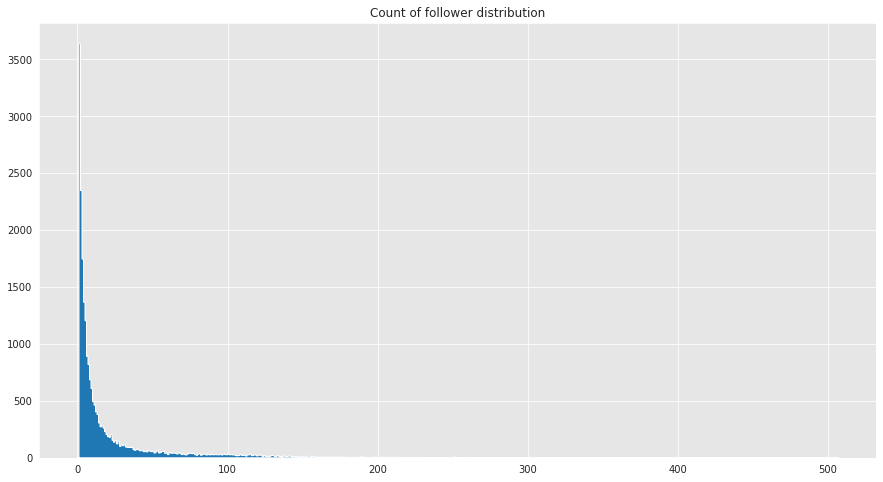

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15,8))
    plt.title("Count of follower distribution")
    plt.hist(df_poli_user_user["user_num_id"].value_counts(), bins=np.arange(max(df_poli_user_user["user_num_id"].value_counts())/3), histtype='stepfilled')

So some people has really large number of followers (Max 2004, but rest of them don't)

In [ ]:
max(df_poli_user_user["user_num_id"].value_counts())

1522

#### Count number of followee [Who is following how many people]

In [ ]:
df_poli_user_user["follower_num_id"].value_counts().values

array([5850, 5156, 4846, ...,    1,    1,    1])

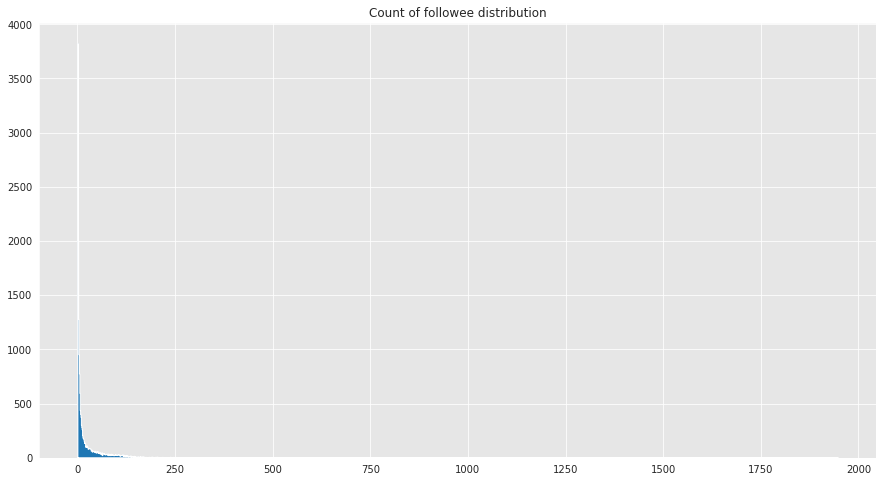

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15,8))
    plt.title("Count of followee distribution")
    plt.hist(df_poli_user_user["follower_num_id"].value_counts(), bins=np.arange(max(df_poli_user_user["follower_num_id"].value_counts())/3), histtype='stepfilled')

In [ ]:
print("Some user are following other",  max(df_poli_user_user["follower_num_id"].value_counts()),  "user! ")

Some user are following other 5850 user! 


#### Counting number news-user

In [ ]:
df_poli_news_user.head()

,news_num_id,user_num_id,times
0,240,1,1
1,124,2,1
2,162,3,1
3,233,4,1
4,50,5,1


In [ ]:
df_poli_news_user.describe()

,news_num_id,user_num_id,times
count,32791.000000,32791.000000,32791.000000
mean,150.977768,11858.326553,1.136257
std,62.432306,6901.970443,0.890450
min,1.000000,1.000000,1.000000
25%,123.000000,5870.500000,1.000000
50%,162.000000,11768.000000,1.000000
75%,200.000000,17847.500000,1.000000
max,240.000000,23865.000000,67.000000


#### Count news

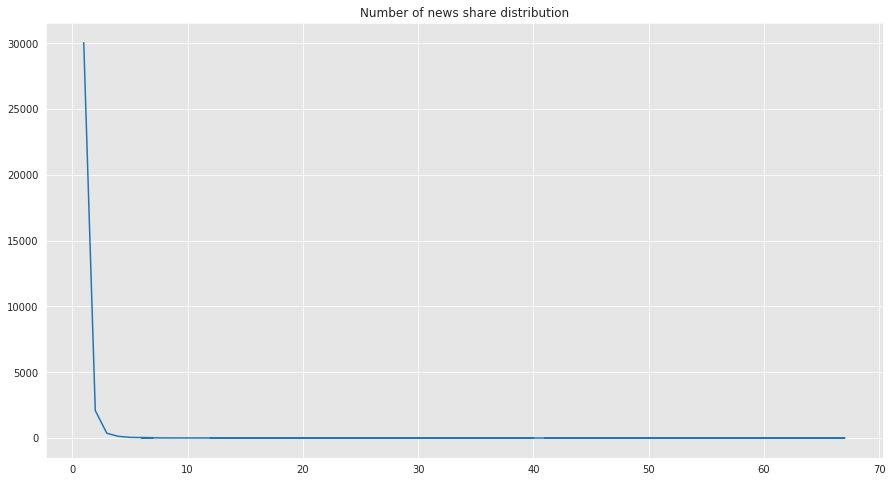

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    #xticks(range(1, 50, 1))
    plt.figure(figsize=(15,8))
    plt.title("Number of news share distribution")
    df_poli_news_user["times"].value_counts().plot()

In [ ]:
df_poli_news_user["times"].value_counts()

1     30052
2      2092
3       364
4       131
5        51
7        26
6        25
8        10
9         7
10        7
11        4
15        3
30        2
12        2
14        2
18        2
21        2
25        2
28        1
40        1
13        1
38        1
51        1
67        1
41        1
Name: times, dtype: int64

#### How many times any specific user has shared

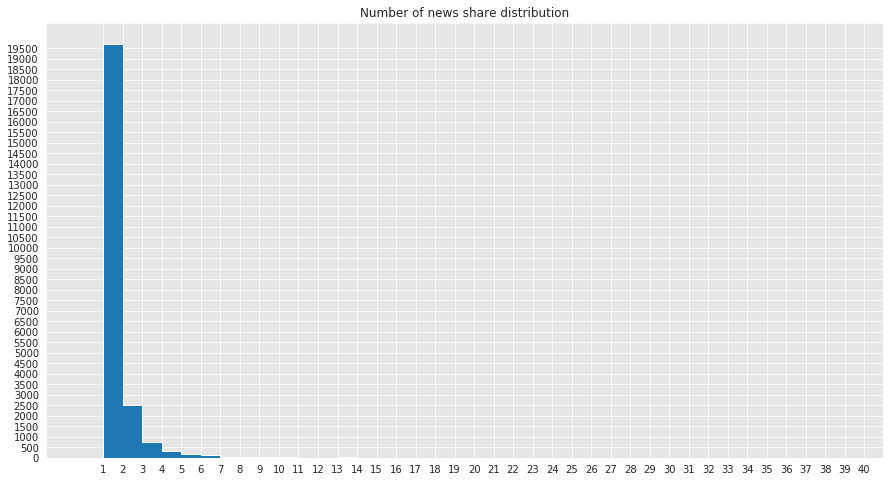

In [ ]:

with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15,8))
    plt.title("Number of news share distribution")
    yticks(range(0, 20000, 500))
    xticks(range(1, max(df_bf_news_user["user_num_id"].value_counts()), 1))
    plt.hist(df_poli_news_user["user_num_id"].value_counts(), bins=np.arange(max(df_poli_news_user["user_num_id"].value_counts())), histtype='stepfilled')

So some people has really large number of followers (Max 2004, but rest of them don't)

In [ ]:
max(df_poli_user_user["user_num_id"].value_counts())

1522

#### Count number of followee [Who is following how many people]

In [ ]:
df_poli_user_user["follower_num_id"].value_counts().values

array([5850, 5156, 4846, ...,    1,    1,    1])

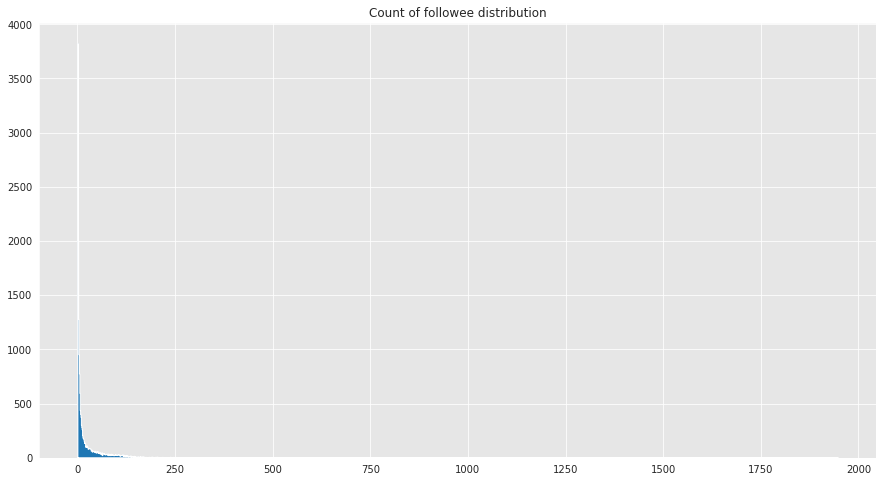

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
        plt.figure(figsize=(15,8))
        plt.title("Count of followee distribution")
        plt.hist(df_poli_user_user["follower_num_id"].value_counts(), bins=np.arange(max(df_poli_user_user["follower_num_id"].value_counts())/3), histtype='stepfilled')

### Do we really need to analyze mat files?

In [ ]:
from scipy.io import loadmat
annots = loadmat(dir_buzz_par+"UserFeature.mat")

In [ ]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [ ]:
type(annots['X']),annots['X'].shape

(scipy.sparse.csc.csc_matrix, (15257, 109626))

In [ ]:
annots['X'].indices

array([ 141,  207,  372, ..., 9994, 9994, 9994], dtype=int32)

In [ ]:
annots['X'].indptr

array([      0,     152,    1761, ..., 1981803, 1981804, 1981805],
      dtype=int32)

:| it seems its the sparse matrix of user connectivity

## Data Analysis

### Authors

#### Real News

In [ ]:
lst_lst_real_authors = df_all_news[df_all_news["news_type"] == "real"]["authors"].values.tolist()
real_authors = []
for sublist in lst_lst_real_authors:
    if not isinstance(sublist, float):
        for item in sublist:
            if not isinstance(item, float):
                real_authors.append(item)

In [ ]:
from itertools import groupby
real_author_count = {value: len(list(freq)) for value, freq in groupby(sorted(real_authors))}

In [ ]:
dic_real_auth = {k: v for k, v in sorted(real_author_count.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
dic_real_auth

{'Jack Shafer': 65,
 'Abc News': 18,
 'View All Posts': 13,
 'Louis Nelson': 11,
 'Brett Bose': 10,
 'Grant Stern': 10,
 'Natalie Dickinson': 10,
 'Nolan D': 9,
 'Burgess Everett': 6,
 'Brent Griffiths': 5,
 'Dan Merica': 5,
 'Deirdre Walsh': 5,
 'Heather Caygle': 5,
 'John Bresnahan': 5,
 'Nahal Toosi': 5,
 'Nick Gass': 5,
 'Philip Hodges': 5,
 'Seung Min Kim': 5,
 'Shane Goldmacher': 5,
 'Cassy Fiano': 4,
 'Colin Taylor': 4,
 'Daniel Strauss': 4,
 'Kyle Cheney': 4,
 'Daniel Lippman': 3,
 'David Wright': 3,
 'Eli Stokols': 3,
 'Glenn Thrush': 3,
 'Hadas Gold': 3,
 'Josh Gerstein': 3,
 'Matthew Nussbaum': 3,
 'More Michael': 3,
 'Nancy Wells': 3,
 'Oliver Willis': 3,
 'Politico Staff': 3,
 'Ryan Denson': 3,
 'Tom Lobianco': 3,
 'Adam Walinsky': 2,
 'Alex Isenstadt': 2,
 'Associated Press': 2,
 'Ben Weyl': 2,
 'Brian Stelter': 2,
 'Cnn Senior Congressional Producer': 2,
 'Cnn White House Producer': 2,
 'Cristiano Lima': 2,
 'Daniella Diaz': 2,
 'Edward-isaac Dovere': 2,
 'Eli Watkins': 

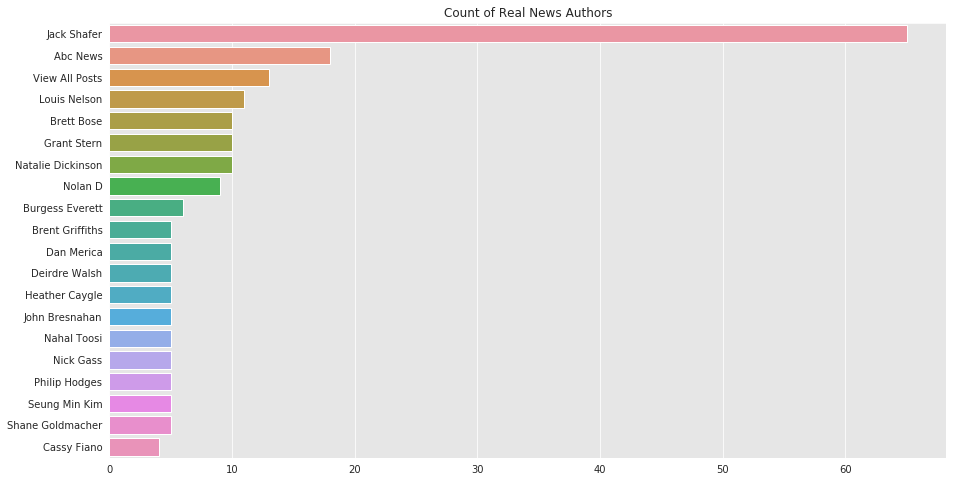

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News Authors")
    sns.barplot(x=list(dic_real_auth.values())[:20], y=list(dic_real_auth.keys())[:20])

#### Fake News

In [ ]:
lst_lst_fake_authors = df_all_news[df_all_news["news_type"] == "fake"]["authors"].values.tolist()
fake_authors = []
for sublist in lst_lst_fake_authors:
    if not isinstance(sublist, float):
        for item in sublist:
            if not isinstance(item, float):
                fake_authors.append(item)

In [ ]:
from itertools import groupby
fake_author_count = {value: len(list(freq)) for value, freq in groupby(sorted(fake_authors))}

In [ ]:
dic_fake_auth = {k: v for k, v in sorted(fake_author_count.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
dic_fake_auth

{'View All Posts': 11,
 'Terresa Monroe-hamilton': 7,
 'Brett Bose': 6,
 'Grant Stern': 6,
 'Natalie Dickinson': 6,
 'Please Enter Your Name Here': 5,
 'About Stryker': 4,
 'Cassy Fiano': 4,
 "Stryker Is A Constitutional Conservative Who Can't Stand The Lazy Cryba Fantasy World Liberals Live In Knowledge Is Power The Truth Will Set You Free May The Good Lord Bless Keep The United States Of America": 4,
 'Colin Taylor': 3,
 'Sierra Marlee': 3,
 'Tiffiny Ruegner': 3,
 'About The Potatriot': 2,
 'Alex Stevan': 2,
 'Ben Marquis': 2,
 'Benjamin Arie': 2,
 'Blair Patterson': 2,
 'Bob Amoroso': 2,
 'Doug Giles': 2,
 'Fed Up': 2,
 'John Falkenberg': 2,
 'Kevin Jackson': 2,
 'Kimberly J Smith': 2,
 'Martin Lioll': 2,
 'Martin Walsh': 2,
 'Mr Wendal': 2,
 'Ny Evening': 2,
 'Philip Hodges': 2,
 'Rich Witmer': 2,
 'Scott Osborn': 2,
 'The Potatriot Is A Constitutional Conservative The Constitutional Republic Of The United States': 2,
 'Tony Elliott': 2,
 'V Saxena': 2,
 'Wendy Gittleson': 2,
 'A D

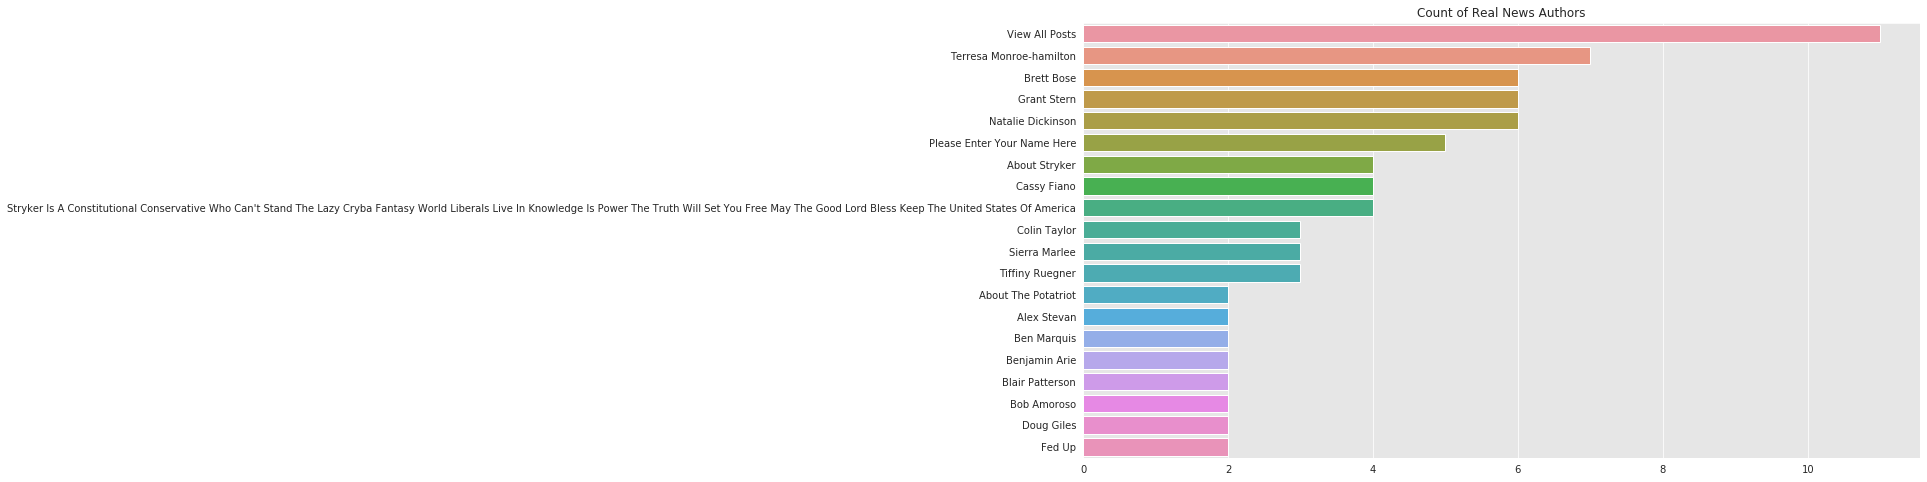

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News Authors")
    sns.barplot(x=list(dic_fake_auth.values())[:20], y=list(dic_fake_auth.keys())[:20])

Dang those names!

### Source

#### Fake News

In [ ]:
df_all_news[df_all_news["news_type"] == "fake"]["source"].value_counts().describe()

count    95.000000
mean      1.831579
std       2.541790
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      17.000000
Name: source, dtype: float64

Too many scources!

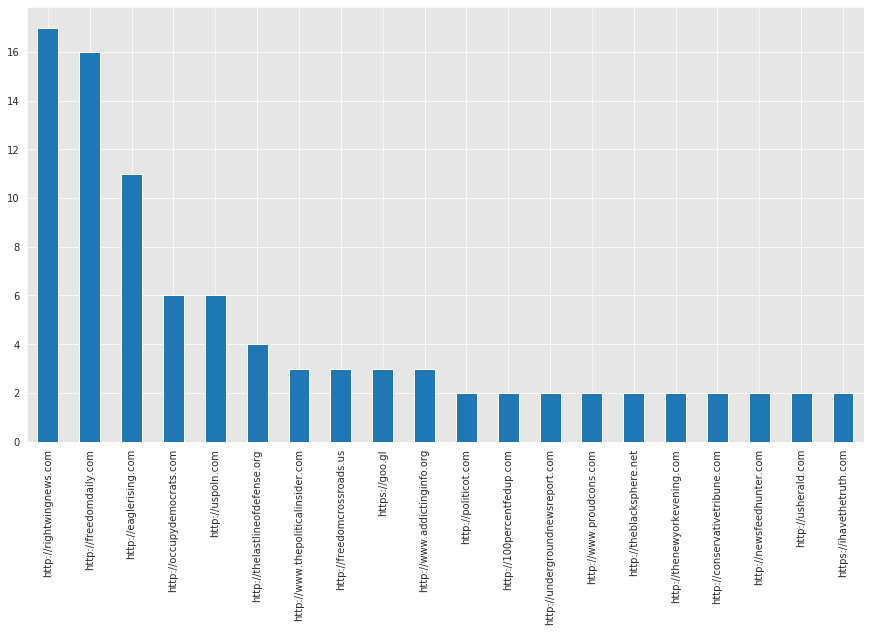

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15, 8))
    df_all_news[df_all_news["news_type"] == "fake"]["source"].value_counts()[:20].plot(kind="bar")

#### Real News

In [ ]:
df_all_news[df_all_news["news_type"] == "real"]["source"].value_counts().describe()

count    19.000000
mean     11.000000
std      18.556221
min       1.000000
25%       2.000000
50%       4.000000
75%      10.500000
max      75.000000
Name: source, dtype: float64

Aha! A few sources!

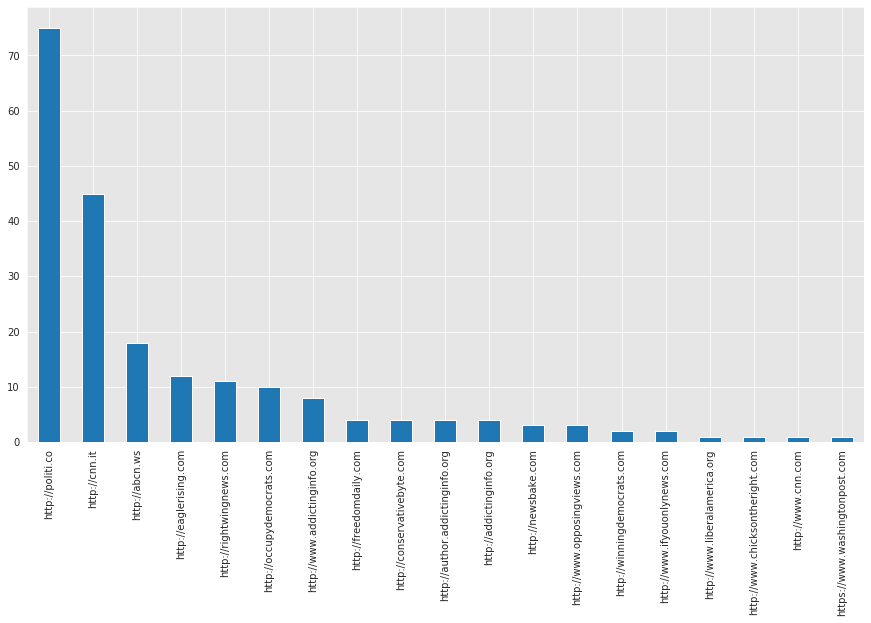

In [ ]:
with sns.axes_style("darkgrid", {"axes.facecolor": ".9"}):
    plt.figure(figsize=(15, 8))
    df_all_news[df_all_news["news_type"] == "real"]["source"].value_counts()[:20].plot(kind="bar")

### Word Cloud

In [ ]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 )
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

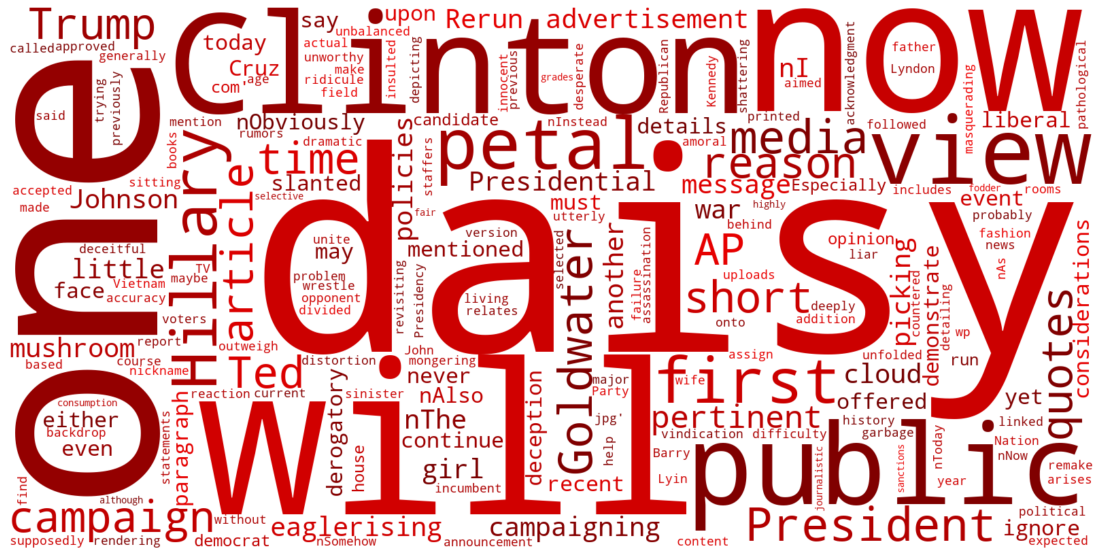

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = df_all_news[df_all_news["news_type"] == "fake"].values


wordcloud = WordCloud(background_color="white", width=1600, height=800, color_func=random_color_func).generate(np.array_str(text.flatten()))


plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
## Real
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(100.0 )
    s = int(100.0)
    l = int(70.0 * float(random_state.randint(30, 100)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

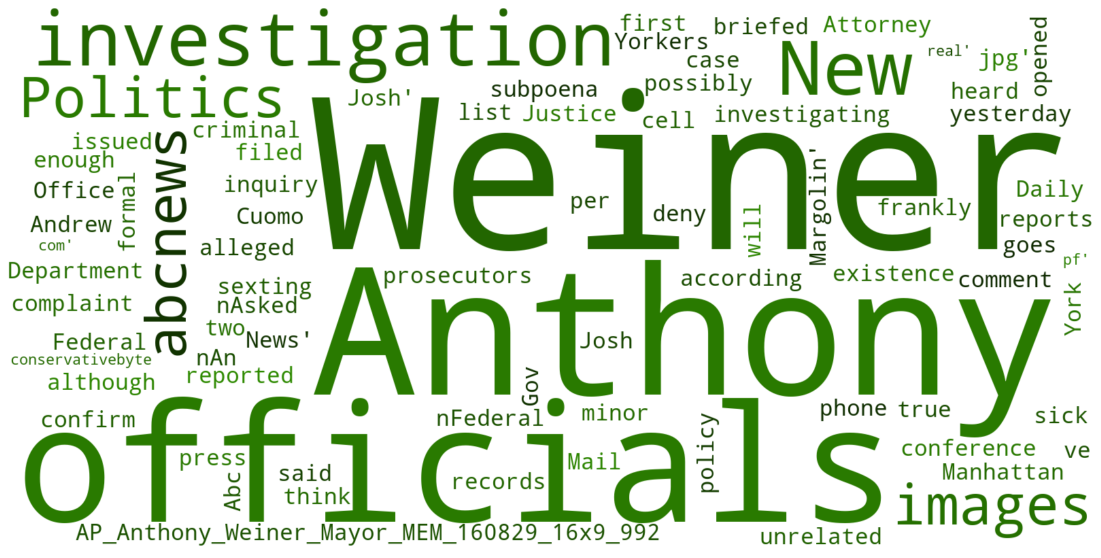

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = df_all_news[df_all_news["news_type"] == "real"].values


wordcloud = WordCloud(background_color="white", width=1600, height=800, color_func=random_color_func).generate(np.array_str(text.flatten()))


plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data Preprocessing

In [ ]:
conda install -c conda-forge wordcloud

## Create graph

### BuzzFeed

#### User User

In [ ]:
df_bf_user_user.columns

Index(['follower_num_id', 'user_num_id'], dtype='object')

In [ ]:
g_b_user_user = nx.from_pandas_edgelist(df_bf_user_user,source='follower_num_id',
                                   target='user_num_id',edge_attr=None,
                                   create_using=nx.DiGraph())

In [ ]:
print("# of nodes = ", nx.number_of_nodes(g_b_user_user))
print("# of edges = ", nx.number_of_edges(g_b_user_user))

# of nodes =  15257
# of edges =  634750


In [ ]:
'''
pos = nx.spring_layout(g_b_user_user)

# larger figure size
plt.figure(3,figsize=(20,20))
nx.draw(g_b_user_user,pos)
plt.show()
'''

'\npos = nx.spring_layout(g_b_user_user)\n\n# larger figure size\nplt.figure(3,figsize=(20,20)) \nnx.draw(g_b_user_user,pos)\nplt.show()\n'

#### User News

In [ ]:
df_bf_news_user

,news_num_id,user_num_id,times
0,45,1,1
1,127,2,1
2,115,3,1
3,180,3,1
4,140,4,1
...,...,...,...
22774,150,15257,1
22775,151,15257,1
22776,152,15257,1
22777,155,15257,1


In [ ]:
g_bi_user_news_bf = nx.Graph()
g_bi_user_news_bf.add_nodes_from(df_bf_news_user['user_num_id'], bipartite=0)
g_bi_user_news_bf.add_nodes_from(df_bf_news_user['news_num_id'], bipartite=1)
g_bi_user_news_bf.add_weighted_edges_from(
    [(row['news_num_id'], row['user_num_id'], 1) for idx, row in df_bf_news_user.iterrows()],
    weight='weight')

In [ ]:
print("# of nodes = ", nx.number_of_nodes(g_bi_user_news_bf))
print("# of edges = ", nx.number_of_edges(g_bi_user_news_bf))

# of nodes =  15257
# of edges =  22779


### Politifact

In [ ]:
df_poli_user_user

,follower_num_id,user_num_id
0,507,1
1,1589,1
2,5307,1
3,11421,1
4,13267,1
...,...,...
574739,22113,23864
574740,6324,23865
574741,10715,23865
574742,11222,23865


In [ ]:
g_p_user_user = nx.from_pandas_edgelist(df_poli_user_user,source='follower_num_id',
                                   target='user_num_id',edge_attr=None,
                                   create_using=nx.DiGraph())

In [ ]:
print("# of nodes = ", nx.number_of_nodes(g_p_user_user))
print("# of edges = ", nx.number_of_edges(g_p_user_user))

# of nodes =  23865
# of edges =  574744


In [ ]:
'''
pos = nx.spring_layout(g_p_user_user)

# larger figure size
plt.figure(3,figsize=(20,20))
nx.draw(g_p_user_user,pos)
plt.show()
'''

'\npos = nx.spring_layout(g_p_user_user)\n\n# larger figure size\nplt.figure(3,figsize=(20,20)) \nnx.draw(g_p_user_user,pos)\nplt.show()\n'

#### User News

In [ ]:
df_poli_news_user

,news_num_id,user_num_id,times
0,240,1,1
1,124,2,1
2,162,3,1
3,233,4,1
4,50,5,1
...,...,...,...
32786,227,23861,1
32787,155,23862,1
32788,227,23863,2
32789,147,23864,1


In [ ]:
g_bi_user_news_poli = nx.Graph()
g_bi_user_news_poli.add_nodes_from(df_poli_news_user['user_num_id'], bipartite=0)
g_bi_user_news_poli.add_nodes_from(df_poli_news_user['news_num_id'], bipartite=1)
g_bi_user_news_poli.add_weighted_edges_from(
    [(row['news_num_id'], row['user_num_id'], 1) for idx, row in df_poli_news_user.iterrows()],
    weight='weight')

In [ ]:
print("# of nodes = ", nx.number_of_nodes(g_bi_user_news_poli))
print("# of edges = ", nx.number_of_edges(g_bi_user_news_poli))

## Debug